In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np

In [17]:
filepath = '/path/to/file'

In [146]:
df_performance_data = pd.read_csv(filepath)
df_performance_data.head(10)

,Timestamp,Average Response Time (ms),90th Percentile Response Time (ms),Throughput (requests/sec),Latency (ms)
0,01-01-2023,649.342831,882.045806,267.960882,334.495009
1,02-01-2023,522.347140,693.839620,57.311821,177.066411
2,03-01-2023,679.537708,844.283939,256.454188,558.286791
3,04-01-2023,854.605971,1277.299297,82.217467,873.949928
4,05-01-2023,503.169325,675.409180,133.779714,499.089363
5,06-01-2023,503.172609,601.236279,235.877064,625.773616
6,07-01-2023,865.842563,987.677858,90.189974,512.274404
7,08-01-2023,703.486946,816.849404,254.491756,485.166552
8,09-01-2023,456.105123,546.588667,258.033545,637.861472
9,10-01-2023,658.512009,766.687455,176.866933,456.458818


In [148]:
df_performance_data.shape

(500, 5)

In [48]:
threshold = 700

#create binary classification target
df_performance_data["Performance Status"] = (df_performance_data["90th Percentile Response Time (ms)"] > threshold).astype(int)
df_performance_data.head(10)

,Timestamp,Average Response Time (ms),90th Percentile Response Time (ms),Throughput (requests/sec),Latency (ms),Performance Status
0,01-01-2023,649.342831,882.045806,267.960882,334.495009,1
1,02-01-2023,522.347140,693.839620,57.311821,177.066411,0
2,03-01-2023,679.537708,844.283939,256.454188,558.286791,1
3,04-01-2023,854.605971,1277.299297,82.217467,873.949928,1
4,05-01-2023,503.169325,675.409180,133.779714,499.089363,0
5,06-01-2023,503.172609,601.236279,235.877064,625.773616,0
6,07-01-2023,865.842563,987.677858,90.189974,512.274404,1
7,08-01-2023,703.486946,816.849404,254.491756,485.166552,1
8,09-01-2023,456.105123,546.588667,258.033545,637.861472,0
9,10-01-2023,658.512009,766.687455,176.866933,456.458818,1


In [150]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

In [160]:
X = df_performance_data.drop(["90th Percentile Response Time (ms)", "Timestamp"], axis=1)
y = df_performance_data["90th Percentile Response Time (ms)"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (350, 3), (350,)
Validation set: (75, 3), (75,)
Test set: (75, 3), (75,)


In [162]:
X_train.head(10)

,Average Response Time (ms),Throughput (requests/sec),Latency (ms)
5,503.172609,235.877064,625.773616
116,543.057646,170.126737,649.407153
45,406.031158,130.902555,723.608920
16,347.433776,208.501426,580.476476
462,410.054898,166.301403,94.515156
357,492.268272,51.890719,564.246065
3,854.605971,82.217467,873.949928
218,452.927290,161.326314,604.458117
405,674.569987,118.701509,298.103048
60,454.165152,213.627804,294.968195


In [164]:
y_train.head(10)

5       601.236279
116     770.554348
45      468.464893
16      439.211441
462     596.834590
357     723.683256
3      1277.299297
218     627.933364
405     854.752158
60      522.162255
Name: 90th Percentile Response Time (ms), dtype: float64

In [166]:
X_test.head(10)

,Average Response Time (ms),Throughput (requests/sec),Latency (ms)
290,508.375550,286.153555,389.811263
316,686.390594,131.758290,427.588472
117,316.264392,76.232545,386.480737
455,391.425433,131.083438,674.281745
268,461.991103,51.234995,637.037694
336,384.900561,200.862148,780.994666
79,152.486217,168.302477,360.009806
208,653.009537,228.956241,809.225536
238,417.642707,157.721881,782.687946
477,612.250031,108.660521,373.513011


In [168]:
X_train.isna().sum()

Average Response Time (ms)    0
Throughput (requests/sec)     0
Latency (ms)                  0
dtype: int64

In [178]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [180]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f} ms")
print(f"Mean Squared Error: {mse:.2f} ms²")
print(f"R² Score: {r2:.3f}")

Mean Absolute Error: 57.80 ms
Mean Squared Error: 4774.31 ms²
R² Score: 0.923


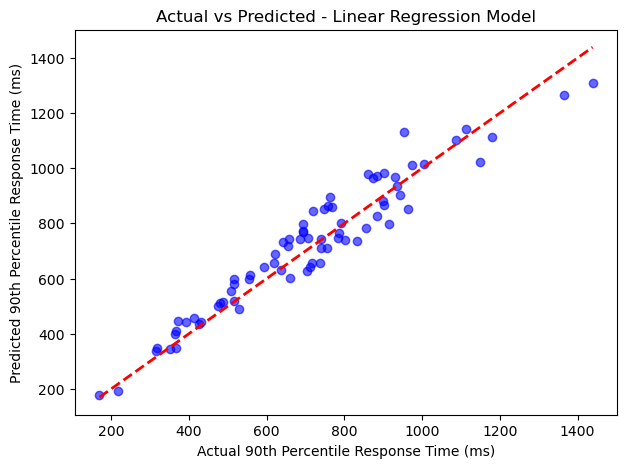

In [182]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual 90th Percentile Response Time (ms)")
plt.ylabel("Predicted 90th Percentile Response Time (ms)")
plt.title("Actual vs Predicted - Linear Regression Model")
plt.show()